In [14]:
from datetime import date

# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# load Dataset
df = pd.read_csv('Uber-Jan-Feb-FOIL.csv')

In [16]:
# Display dataset
df.head()


,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [17]:
# basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [21]:
# Data Preprocessing
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract datetime features
df['Hour'] = df['date'].dt.hour         # This will throw NaN if time info is missing
df['Day'] = df['date'].dt.day
df['Dayofweek'] = df['date'].dt.dayofweek
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year


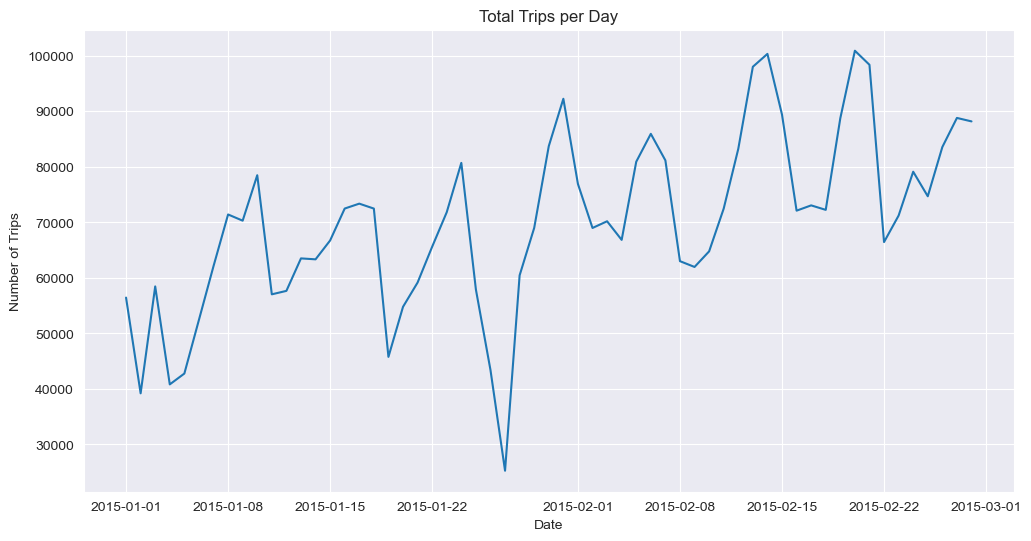

In [28]:
# Exploratory Data Analysis
daily_trips = df.groupby(df['date'].dt.date)['trips'].sum()

plt.figure(figsize=(12, 6))
daily_trips.plot(kind='line')
plt.title('Total Trips per Day')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()


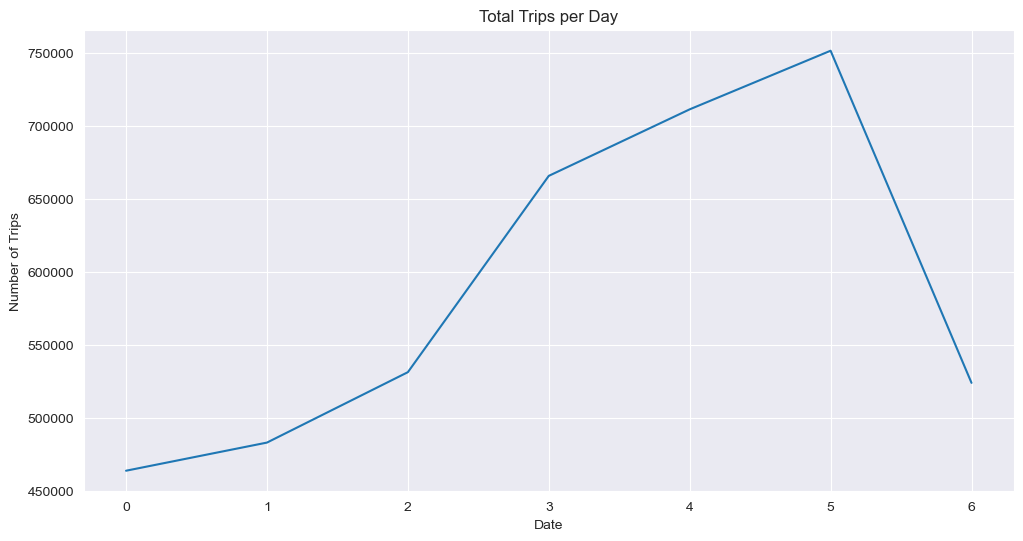

In [31]:
# Plotting the number of trips per day of the week
trips_per_day = df.groupby(df['date'].dt.dayofweek)['trips'].sum()

plt.figure(figsize=(12, 6))
trips_per_day.plot(kind='line')
plt.title('Total Trips per Day')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

Mean Squared Error: 3440482.223438027
R^2 Score: 0.9680933489426485


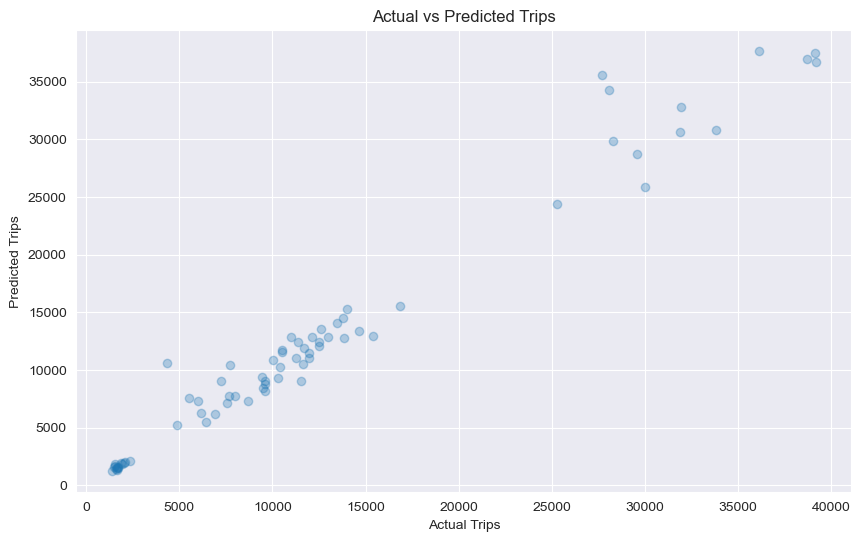

In [34]:
# Feature Engineering
# Create dummy variables
df = pd.get_dummies(df, columns=['dispatching_base_number'], drop_first=True)

# Extract date features (if not already done)
df['Day'] = df['date'].dt.day
df['Dayofweek'] = df['date'].dt.dayofweek
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

# Define features (excluding 'Hour' since it's always 0)
X = df[['Day', 'Dayofweek', 'Month', 'Year'] +
       [col for col in df.columns if col.startswith('dispatching_base_number_')]]

y = df['trips']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model building
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

# Predictions
y_pred = rfr.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Trips')
plt.ylabel('Predicted Trips')
plt.title('Actual vs Predicted Trips')
plt.grid(True)
plt.show()